<a href="https://colab.research.google.com/github/shashankTwr/sampleProjects/blob/master/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install fastcore==1.0.9
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.5MB/s 
     |████████████████████████████████| 1.0MB 29.5MB/s 
     |████████████████████████████████| 358kB 43.3MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 40kB 5.8MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 2.6MB 26.9MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import os
os.mkdir('girl')

In [5]:
path=Path('girl')
path

Path('girl')

In [6]:
folder = 'pretty'
file ='pretty.csv'

In [11]:
folder = 'ugly'
file ='ugly.csv'

In [12]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
path/file, dest

(Path('girl/pretty.csv'), Path('girl/pretty'))

In [ ]:
doc(download_images)

In [13]:
download_images( dest , path/file,max_pics=700)

In [ ]:
doc(verify_images)

In [14]:
classes=['pretty','ugly']

In [15]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

pretty


TypeError: ignored

In [16]:
np.random.seed(42)

In [17]:
girl = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [18]:
dls = girl.dataloaders(path)

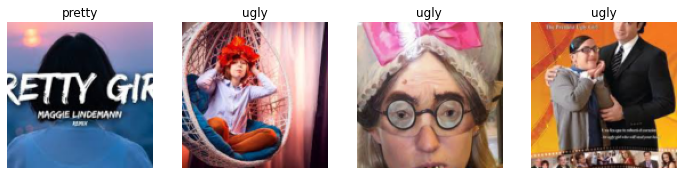

In [19]:
dls.valid.show_batch(max_n=4, nrows=1)

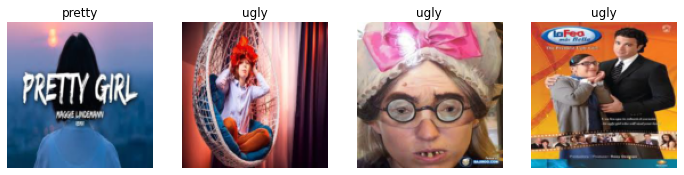

In [20]:
girl = girl.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = girl.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

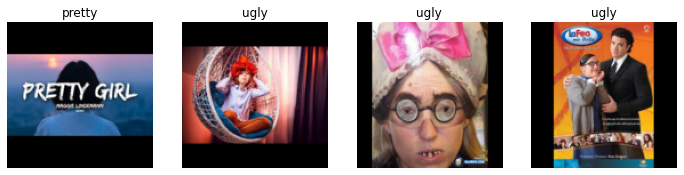

In [21]:
girl = girl.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = girl.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

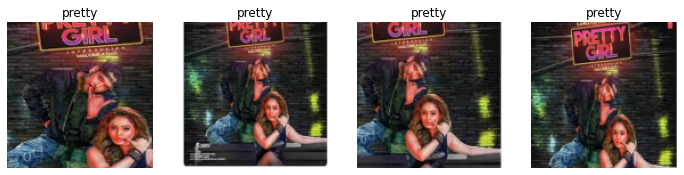

In [22]:
girl = girl.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = girl.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

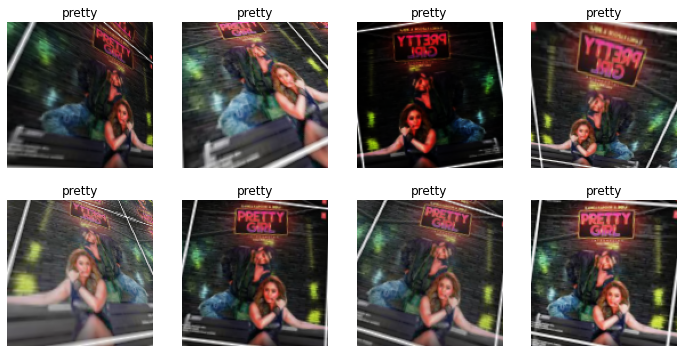

In [23]:
girl = girl.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = girl.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [24]:
girl = girl.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = girl.dataloaders(path)

In [25]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.092106,0.816265,0.331361,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.784599,0.843288,0.289941,00:14
1,0.703832,0.890161,0.236686,00:14
2,0.654971,1.025434,0.272189,00:14
3,0.572625,1.002685,0.260355,00:14


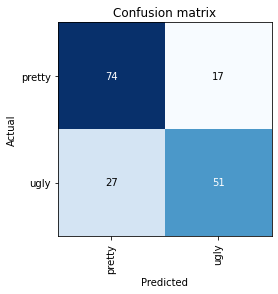

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

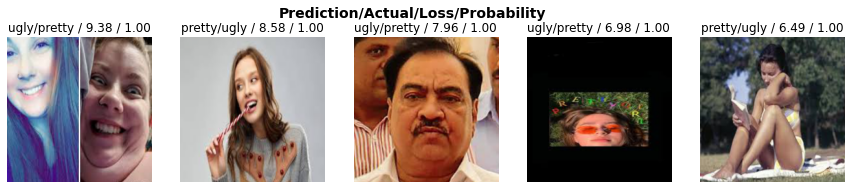

In [28]:
interp.plot_top_losses(5, nrows=1)

In [29]:
learn.export()

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.422660,0.847490,0.236686,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.378872,0.971982,0.266272,00:04


In [ ]:
learn_inf = load_learner('export.pkl')

In [ ]:
learn_inf.dls.vocab

(#2) ['pretty','ugly']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: pretty; Probability: 0.9873')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

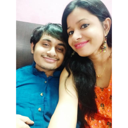

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])